In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('seaborn-white')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

In [2]:
# Importing data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data cleaning

In [5]:
#checking the null percentage in each category
null_percentage = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
print(null_percentage)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [6]:
# check for duplicate 
df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [7]:
df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

There are no duplicate values in Prospect ID and Lead number as these are just ID's both can be dropped


In [8]:
#dropping Lead Number and Prospect ID since they have all unique values
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
df = df.replace('Select', np.nan)

In [10]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

The unique columns can be dropped

In [11]:
df= df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [12]:
#checking the null percentage in each category
null_percentage = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
print(null_percentage)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

columns with more than 40% of null values can be dropped


In [13]:
#dropping columns with more than 40% null values
df= df.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis =1)

In [14]:
#checking the null percentage in each category
null_percentage = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
print(null_percentage)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

The number of Null values is high in some columns as we can see but removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'NA'. This way we have all the data and almost no null values.

In [15]:
df['Specialization'] = df['Specialization'].fillna('NA')
df['City'] = df['City'].fillna('NA')
df['Tags'] = df['Tags'].fillna('NA')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('NA')
df['What is your current occupation'] = df['What is your current occupation'].fillna('NA')
df['Country'] = df['Country'].fillna('NA')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [16]:
df['Country'].value_counts()

India                   6492
NA                      2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [17]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "NA":
        category = "NA"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

India            6492
NA               2461
outside india     287
Name: Country, dtype: int64

In [18]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India
df['Country'] = df['Country'].replace('NA','India')
df['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [19]:
#Checking the percent of lose if the null values are removed
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

1.48

In [20]:
df = df[df.isnull().sum(axis=1) <1]

As the number of cases for outside india is negligible considering India cases we can drop country column

In [21]:
df= df.drop(['Country'],axis =1)

In [22]:
#checking the null percentage in each category
null_percentage = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
print(null_percentage)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                      0.0
Converted                                     

In [23]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

NA                             3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

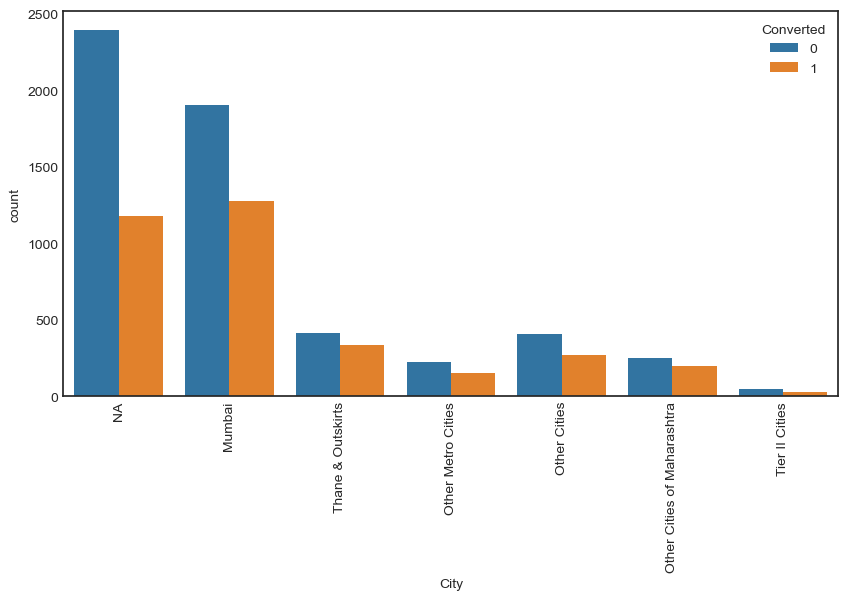

In [24]:
#plotting spread of City columnn
plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

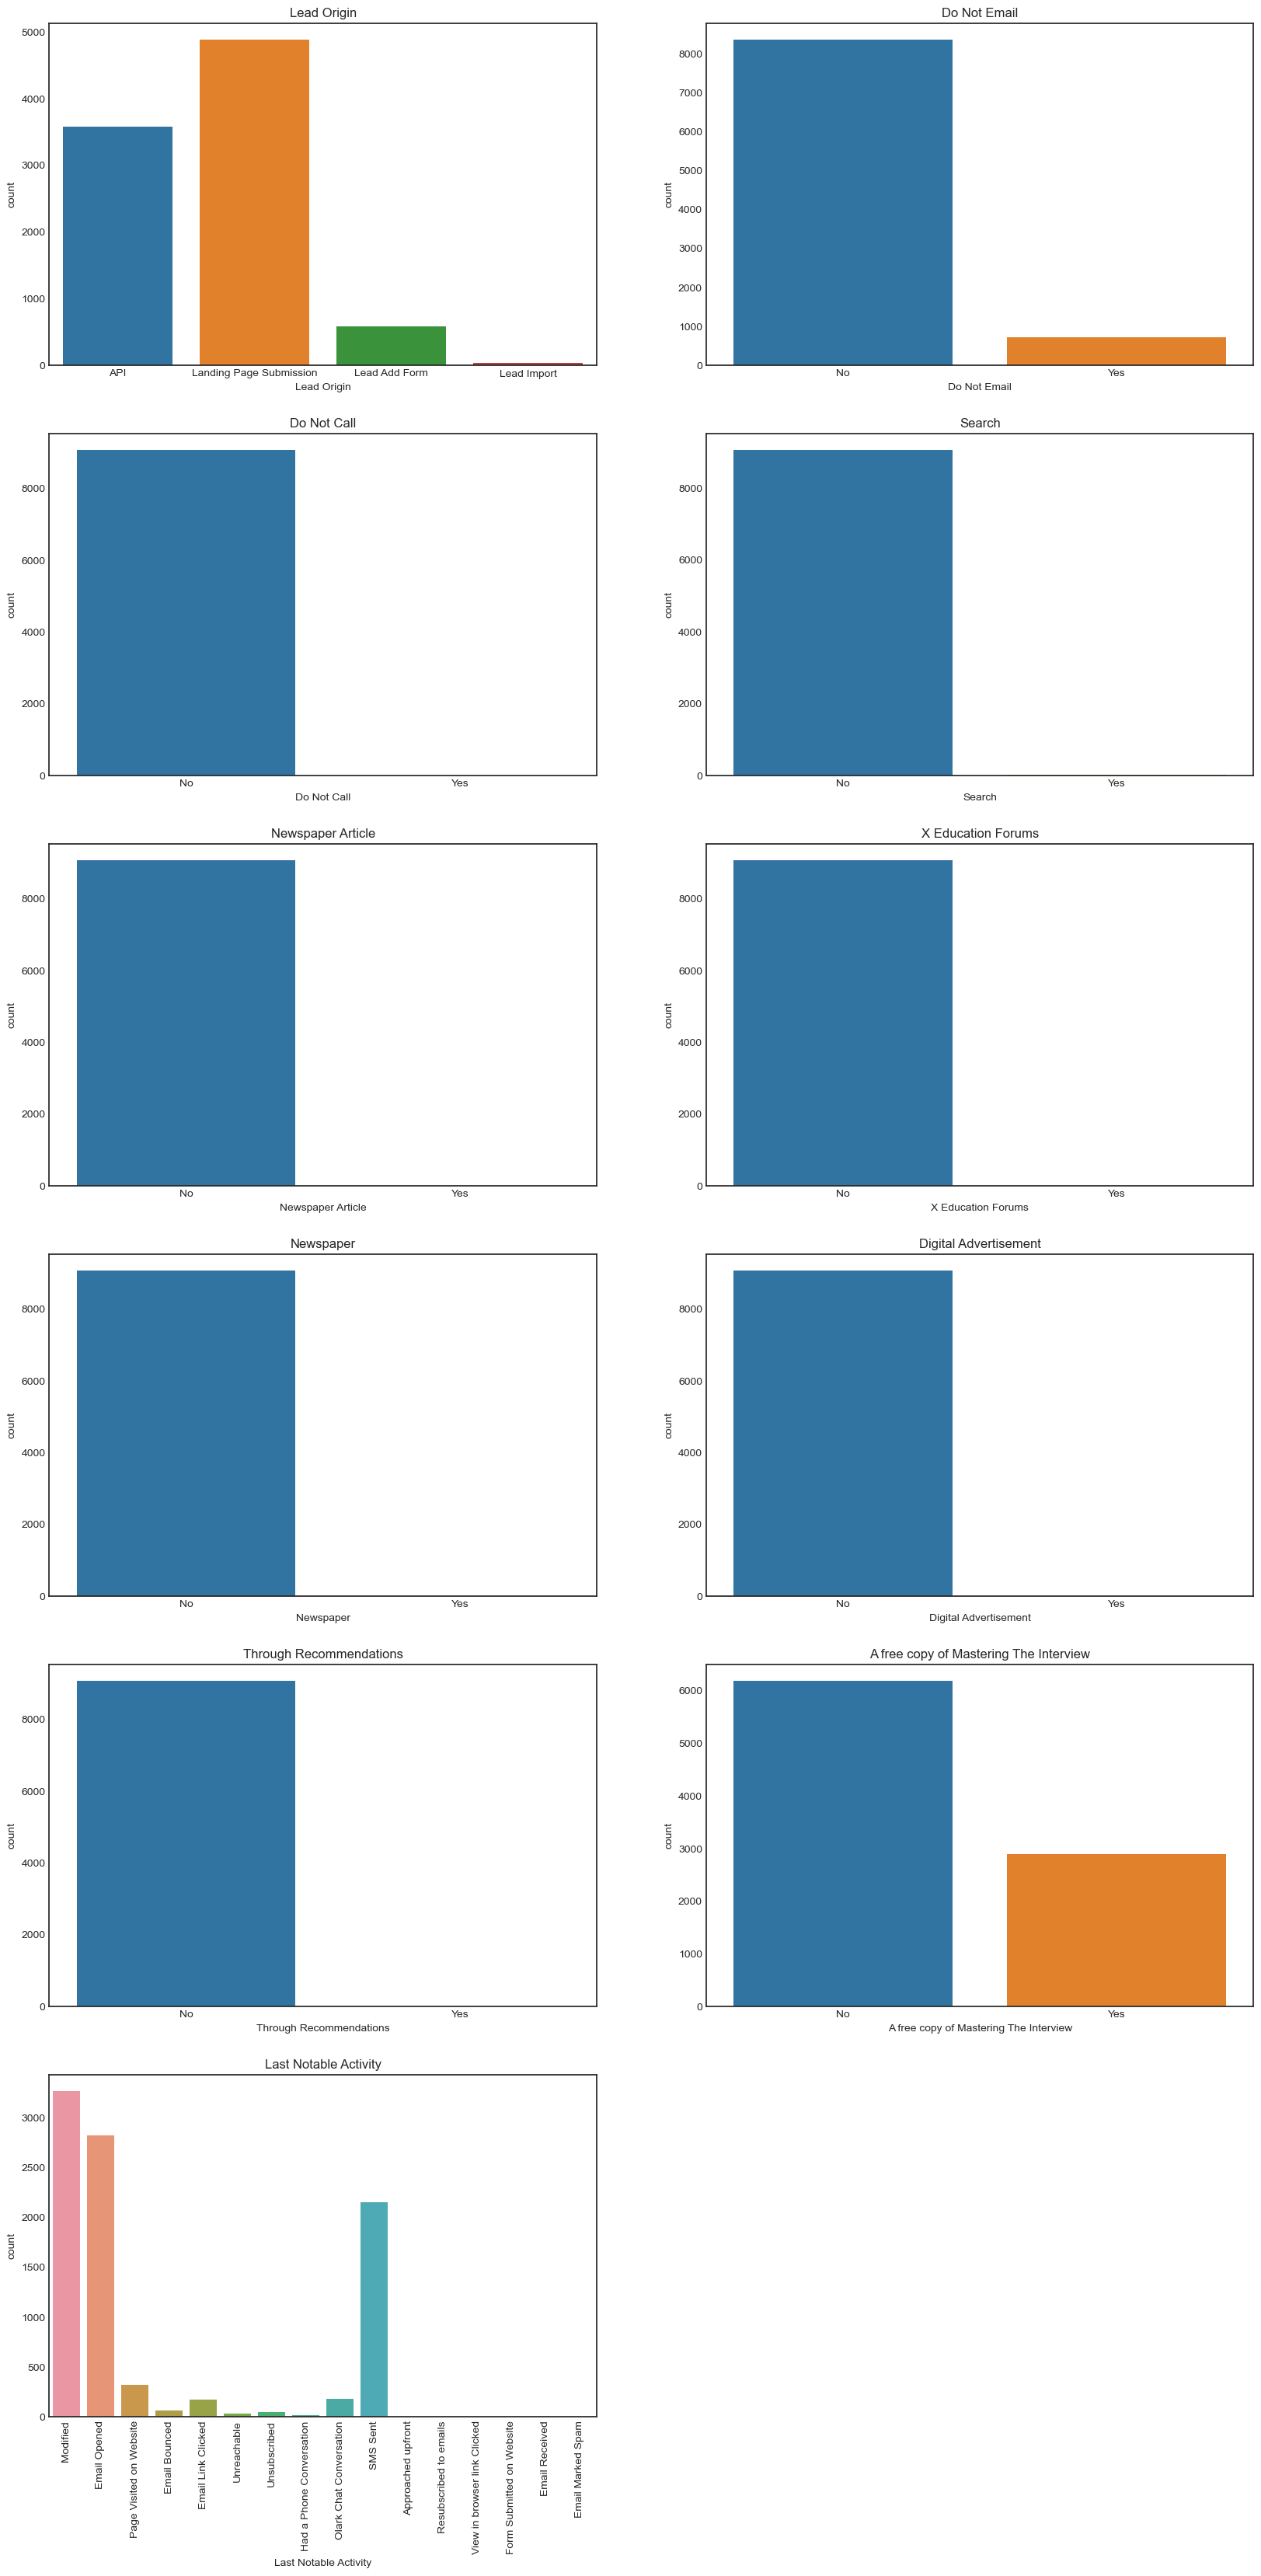

In [25]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Search'])
plt.title('Search')
plt.subplot(6,2,5)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.subplot(6,2,11)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

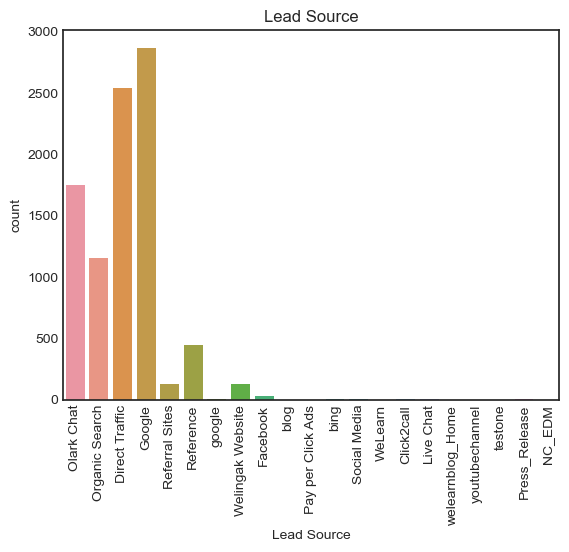

In [26]:
sns.countplot(df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

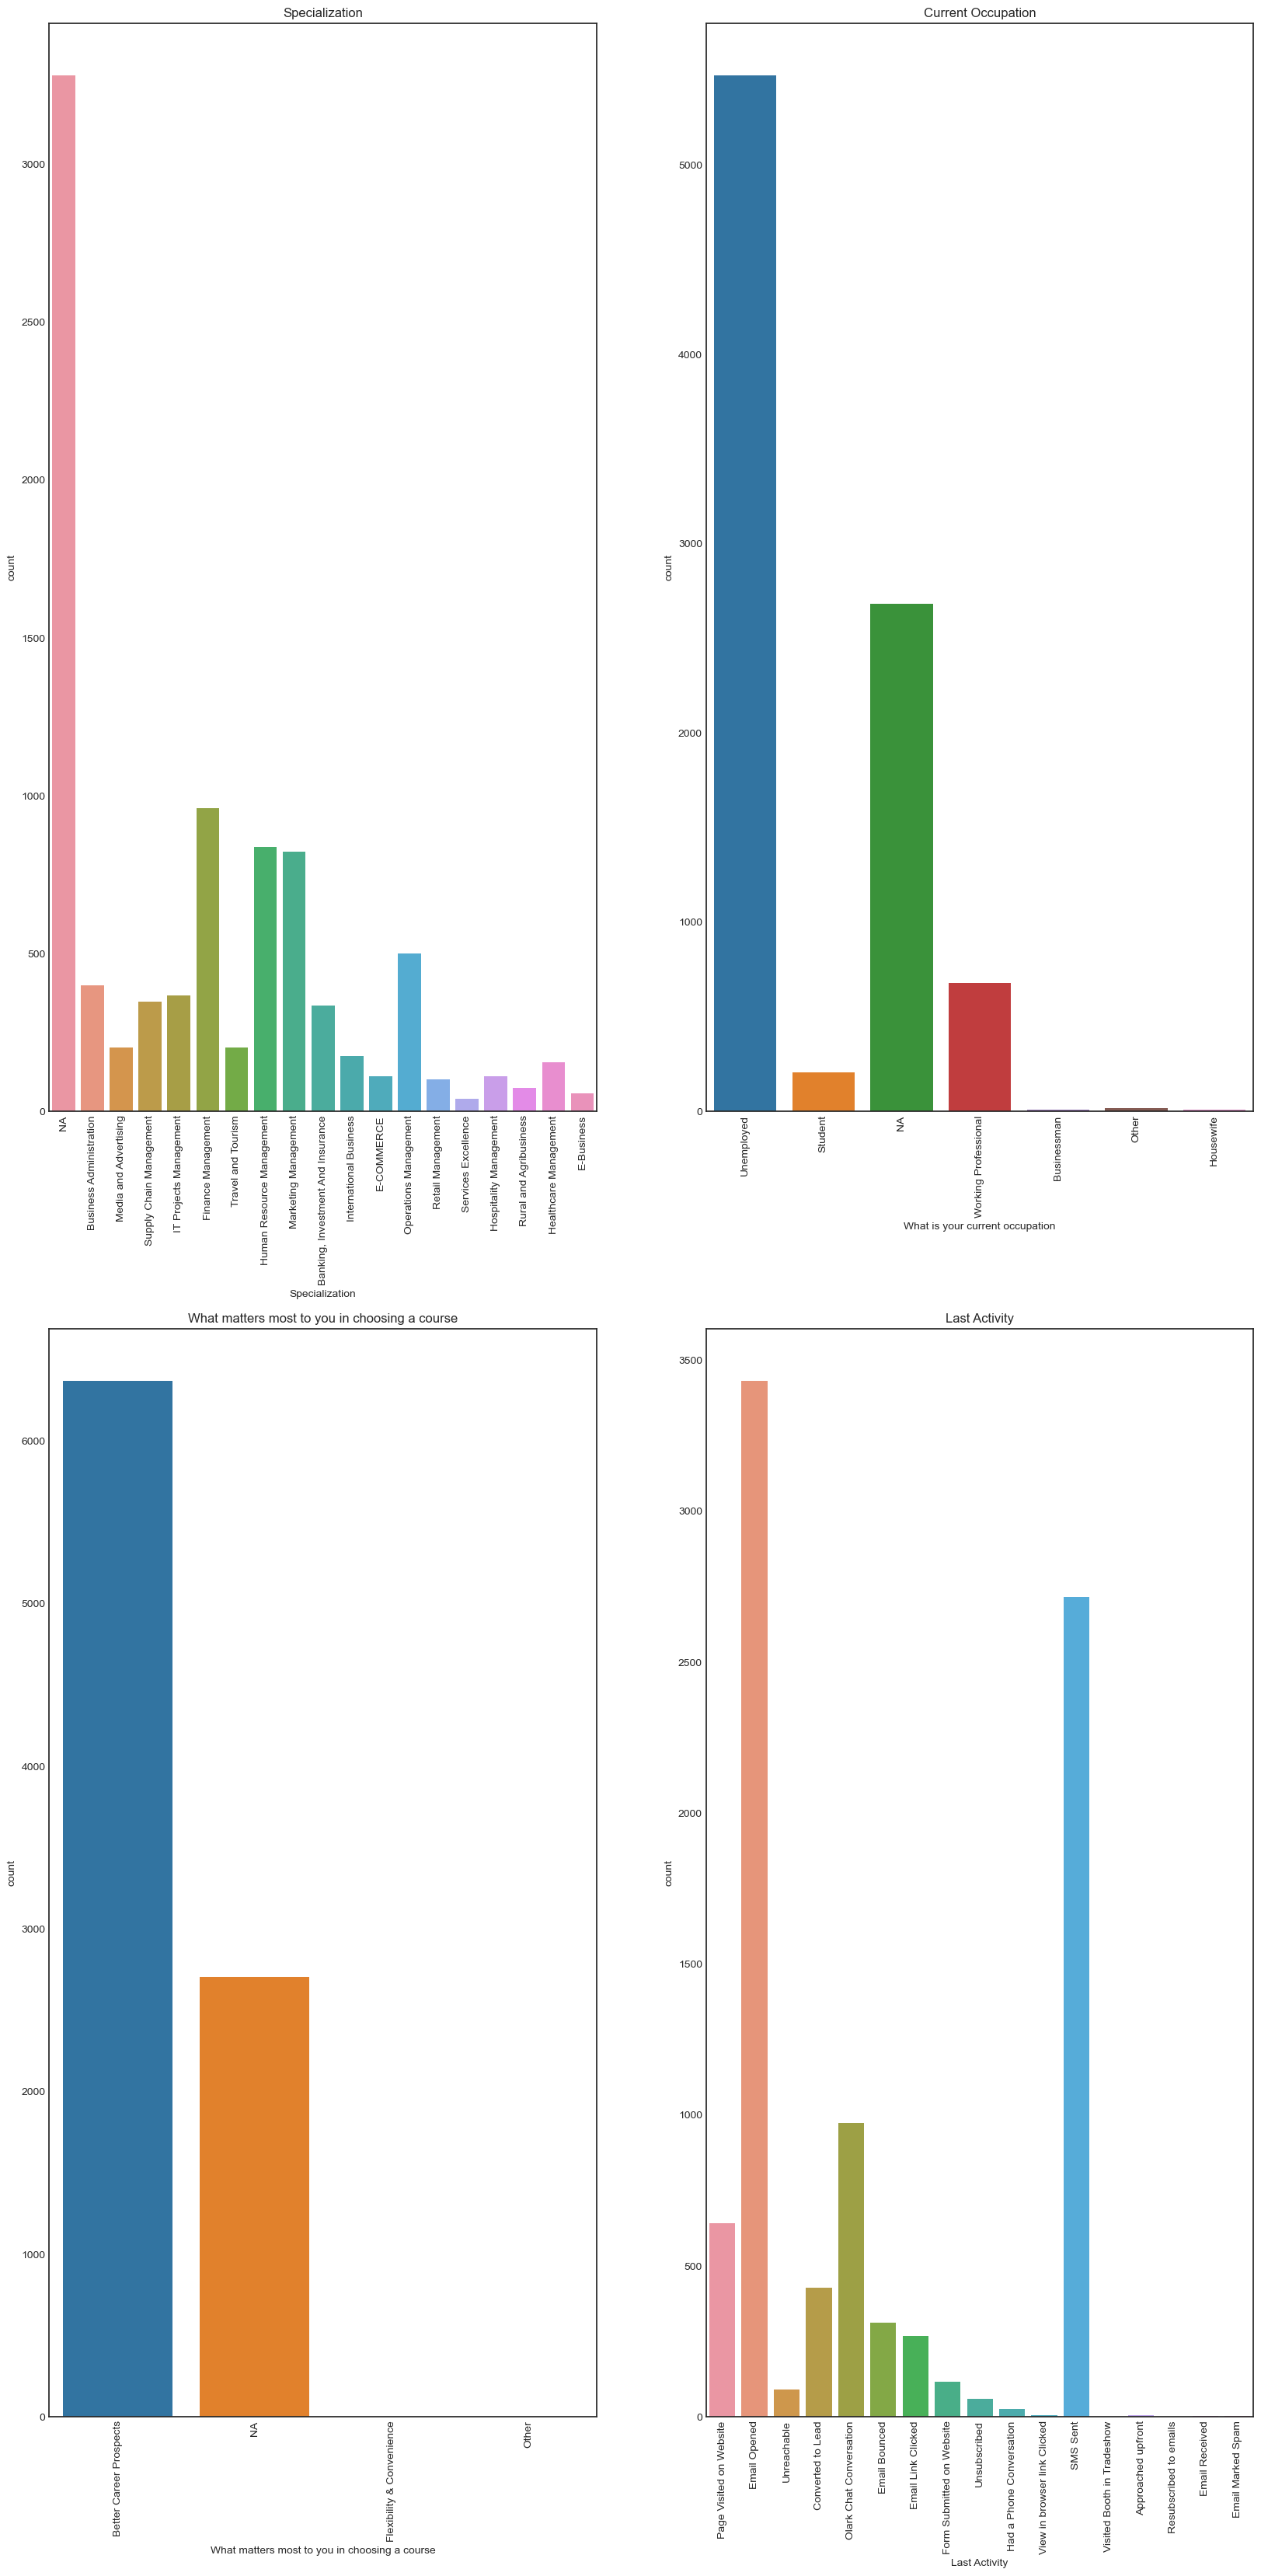

In [27]:
plt.figure(figsize = (20,40))
plt.subplot(2,2,1)
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

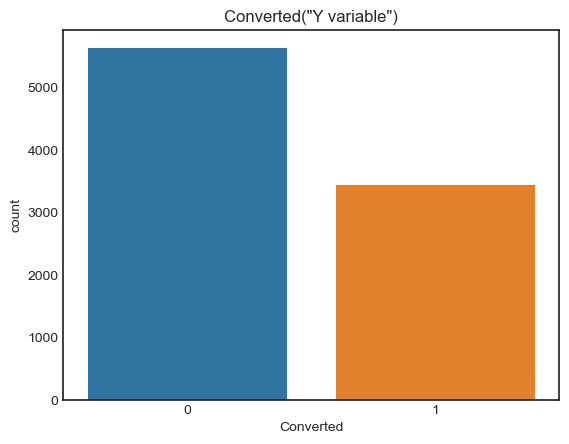

In [28]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

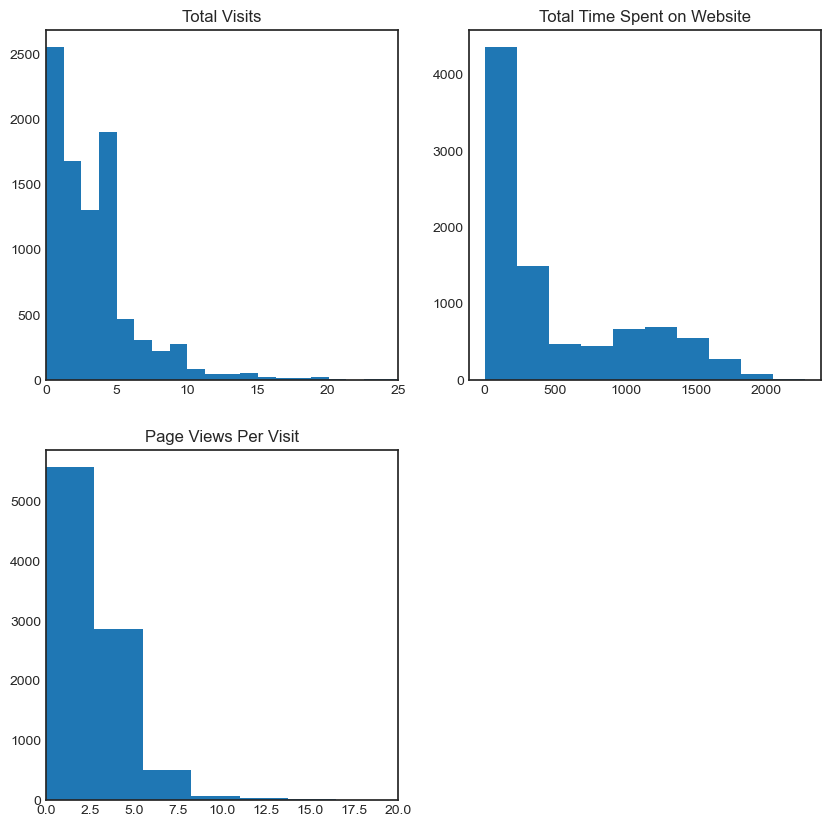

In [29]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )         

## Relating categorical variables with Converted

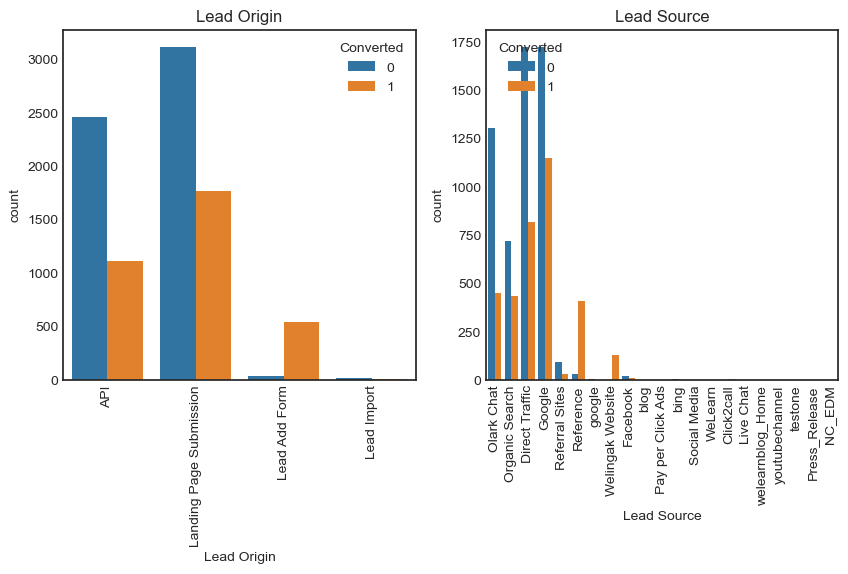

In [30]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

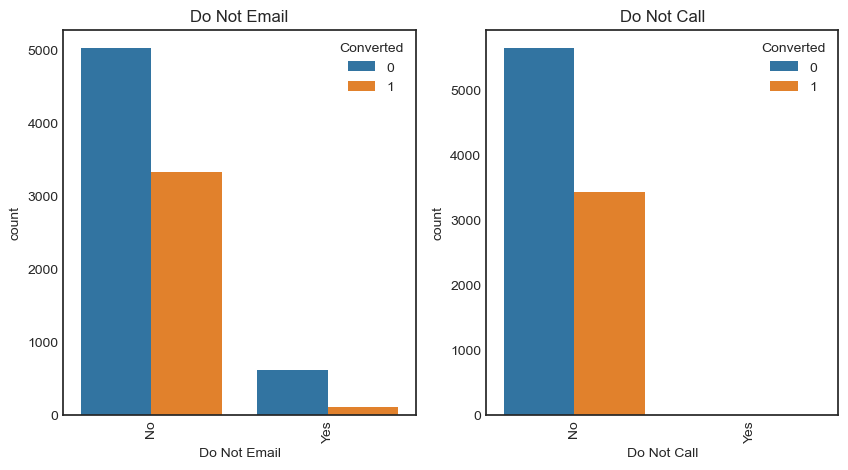

In [31]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'Last Activity')

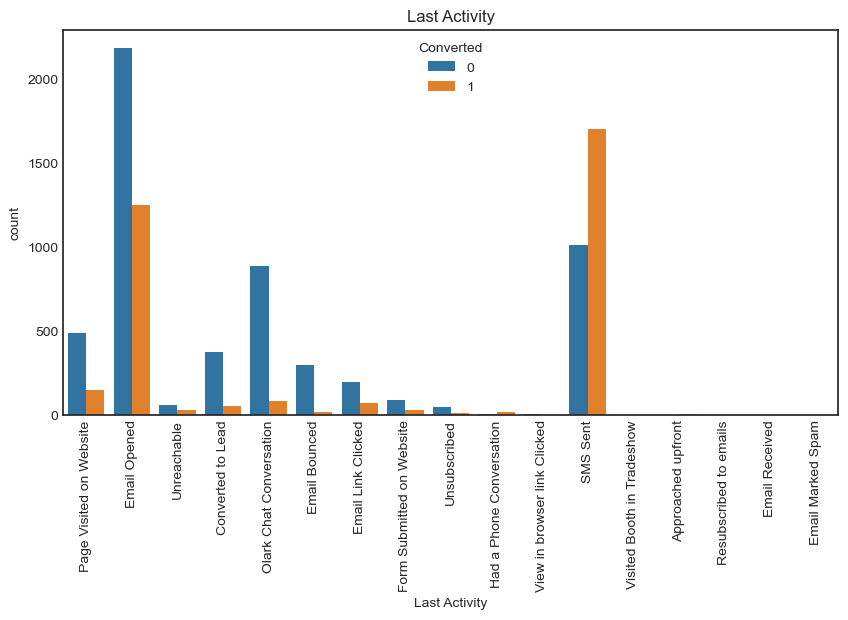

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

Text(0.5, 1.0, 'Specialization')

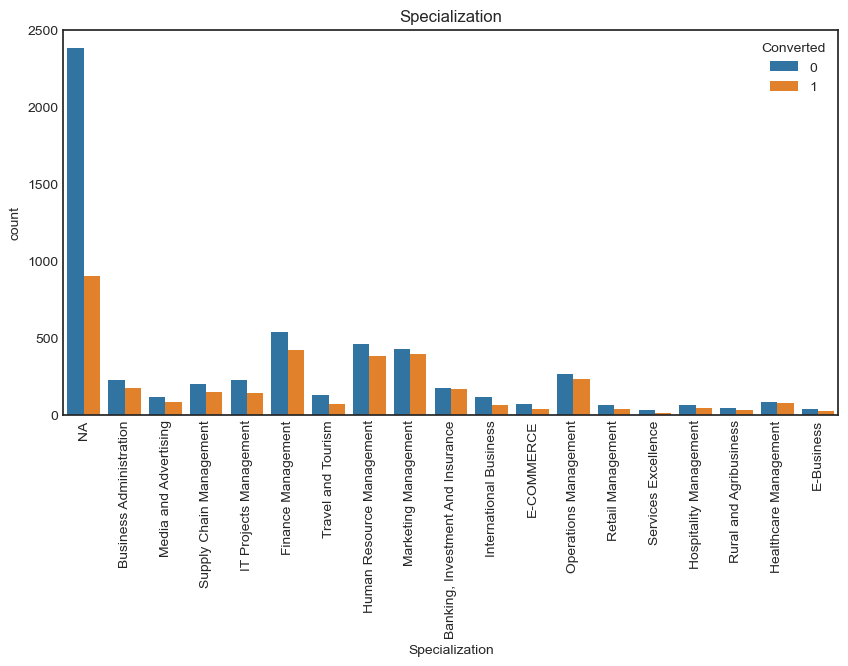

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

Text(0.5, 1.0, 'What is your current occupation')

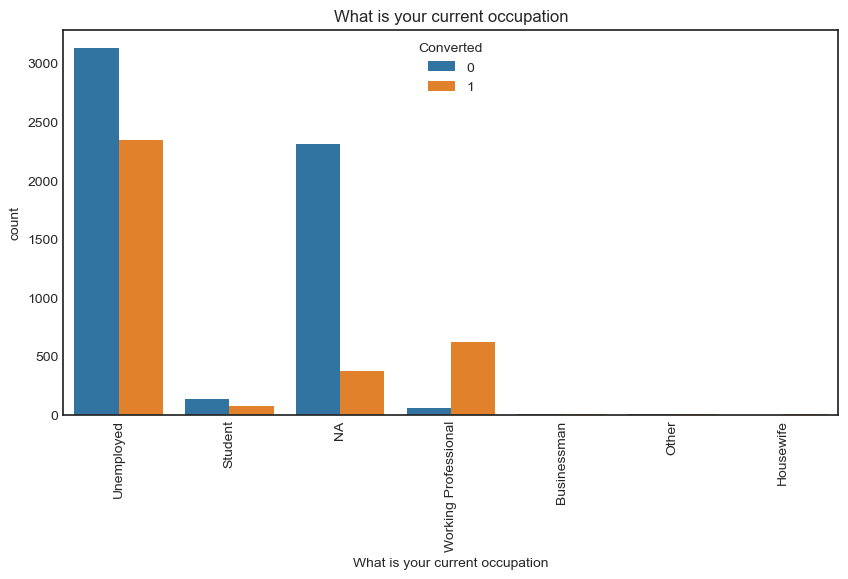

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

Text(0.5, 1.0, 'What matters most to you in choosing a course')

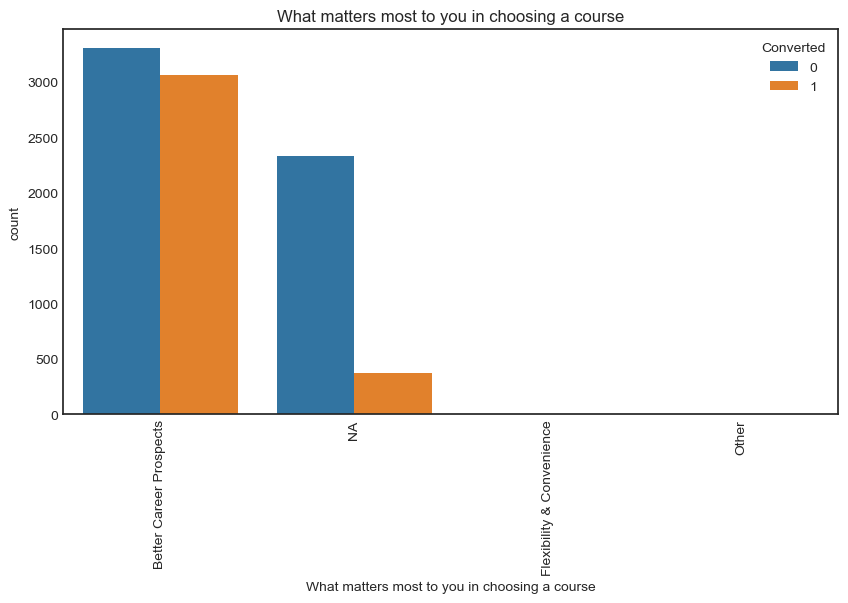

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

Text(0.5, 1.0, 'Search')

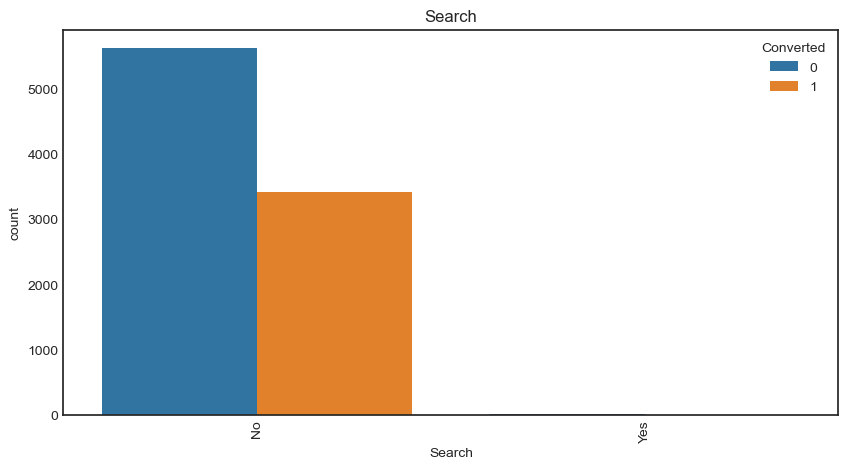

In [36]:
plt.figure(figsize = (10,5))
sns.countplot(x='Search', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Search')

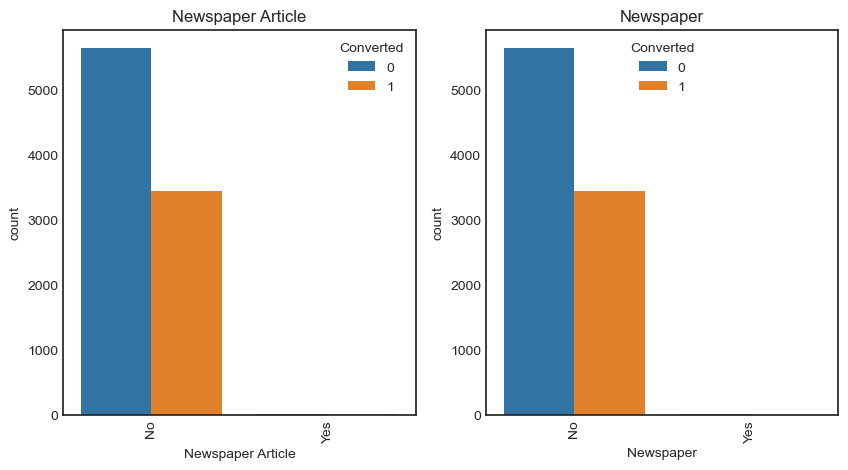

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')
plt.show()

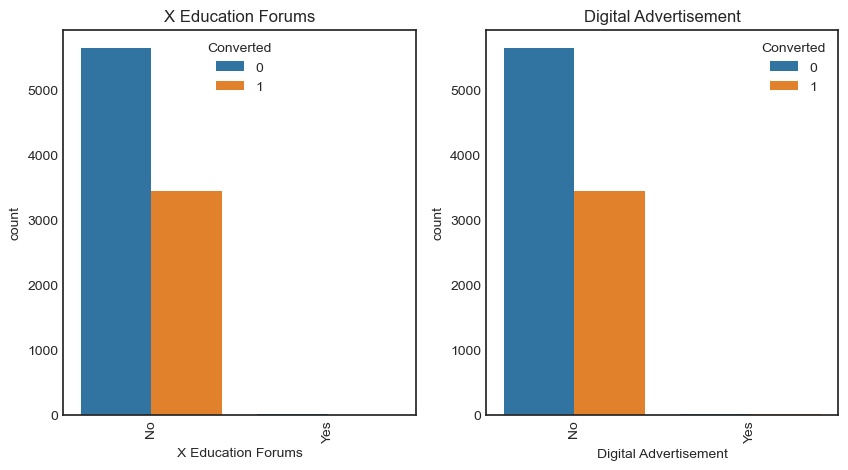

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='X Education Forums', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

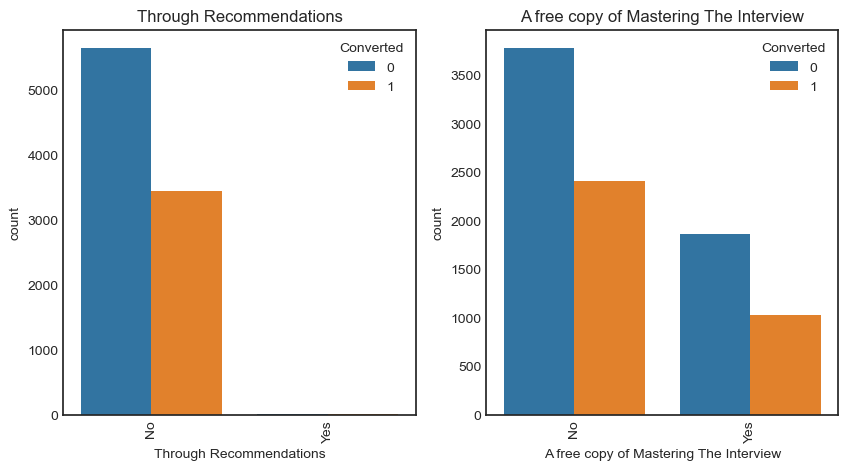

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

Text(0.5, 1.0, 'Last Notable Activity')

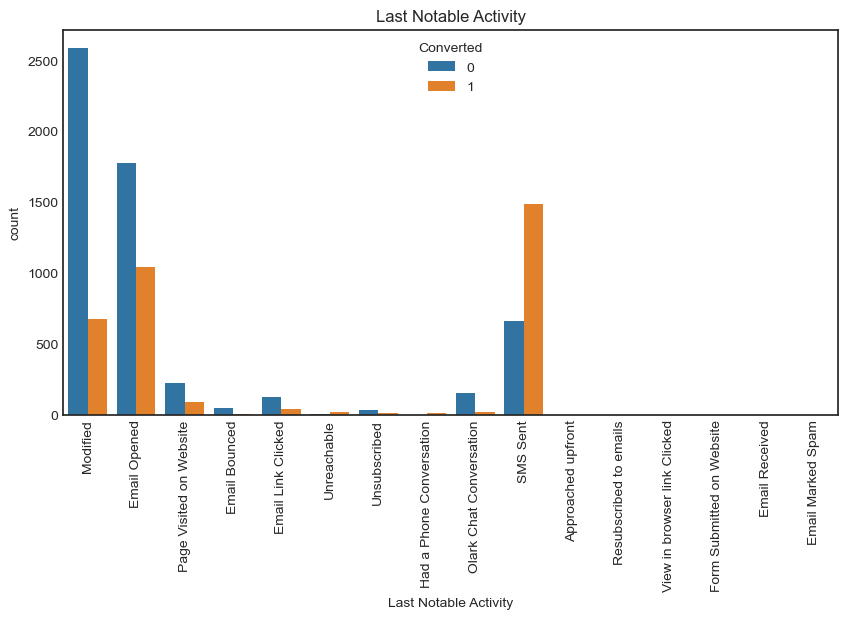

In [40]:
plt.figure(figsize = (10,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

### Checking for outliers

In [41]:
numeric = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


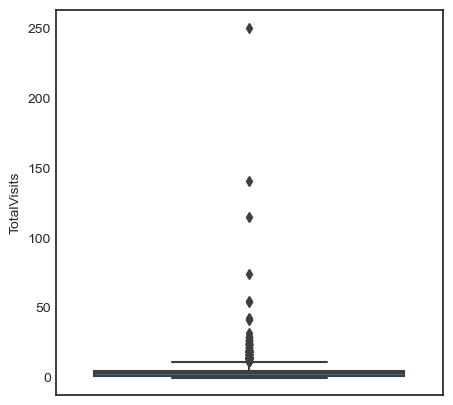

In [42]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df['TotalVisits'])
plt.show()

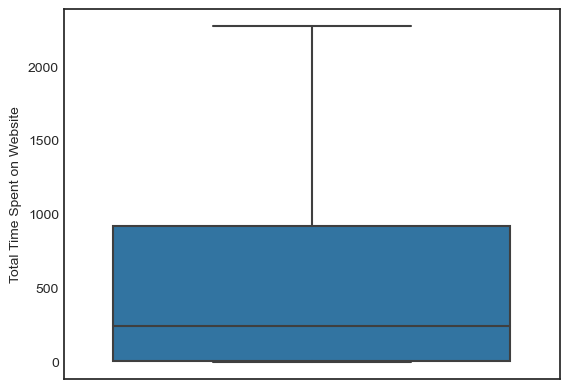

In [43]:
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

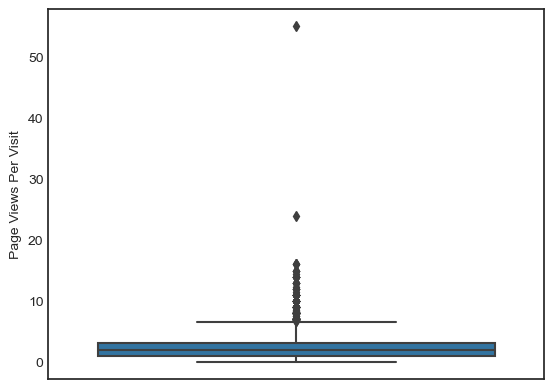

In [44]:
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

Outliers can be seen in total visit.

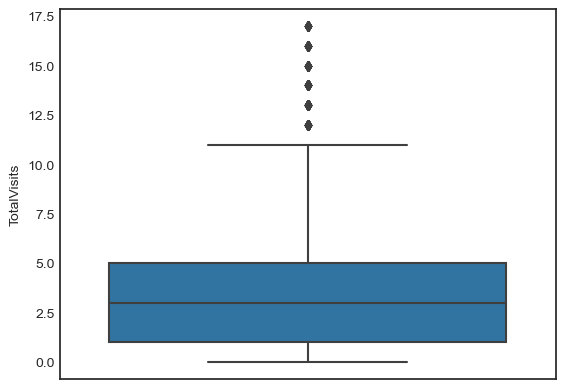

In [45]:
#Removing outliers from Total visit

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

As Tags tells the current status of the leads only that column can be dropped

In [47]:
df= df.drop(['Tags'],axis =1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [49]:
#Making list of categorical variables
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_dum = pd.concat([df, dummy], axis=1)
df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NA,Unemployed,Better Career Prospects,No,No,No,No,No,No,NA,No,Modified,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,NA,Unemployed,Better Career Prospects,No,No,No,No,No,No,NA,No,Email Opened,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,NA,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Email Marked Spam,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,SMS Sent,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,SMS Sent,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,NA,NA,No,No,No,No,No,No,Other Metro Cities,No,SMS Sent,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
df_dum =df_dum.drop(['City','What is your current occupation','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Now the data is ready for splitting data into Test and train subsets

In [52]:
X = df_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Putting the target variable in y
y = df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
#Splitting the data set
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [55]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Model Building



In [56]:
# Doing LogisticRegression and RFE
lr = LogisticRegression()
rfe = RFE(lr,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

In [57]:
#Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Specialization_Business Administration', False, 58),
 ('Specialization_E-Business', False, 26),
 ('Specialization_E-COMMERCE', False, 55),
 ('Specialization_Finance Management', False, 39),
 ('Specialization_Healthcare Management', False, 49),
 ('Specialization_Hospitality Management', False, 20),
 ('Specialization_Human Resource Management', False, 60),
 ('Specialization_IT Projects Management', False, 54),
 ('Specialization_International Business', False, 57),
 ('Specialization_Marketing Management', False, 40),
 ('Specialization_Media and Advertising', False, 21),
 ('Specialization_NA', True, 1),
 ('Specialization_Operations Management', False, 47),
 ('Specialization_Retail Management', False, 15),
 ('Specialization_Rural and Agribusiness', Fals

In [58]:
# Put all the columns selected by RFE in the variable 'columns'
columns = X_train.columns[rfe.support_]

In [59]:
#p-values and VIFs
# Selecting columns selected by RFE
X_train = X_train[columns]

In [60]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.0
Date:                Tue, 21 Mar 2023   Deviance:                       4972.0
Time:                        07:07:56   Pearson chi2:                 6.42e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4149
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1584      0.167      0.946      0.344      -0.170       0.487
TotalVisits                                              1.7453      0.305      5.718      0.000       1.147       2.344
Total Time Spent on Website                              4.6419      0.173     26.769      0.000       4.302       4.982
Page Views Per Visit                                    -2.0242      0.454     -4.458      0.000      -2.914      -1.134
Lead Origin_Landing Page Submission                     -0.9029      0.132     -6.845      0.000      -1.161      -0.644
Lead Origin_Lead Add Form                                3.5700      0.273     13.090      0.000       3.035       4.105
Specialization_NA                                       -0.8712      0.130     -6.716      0.000      -1.125      -0.617
Lead Source_Olark Chat                                   1.2754      0.139      9.148      0.000       1.002       1.549
Lead Source_Welingak Website                             2.9199      1.042      2.802      0.005       0.878       4.962
Do Not Email_Yes                                        -1.4347      0.209     -6.858      0.000      -1.845      -1.025
Last Activity_Email Bounced                             -1.1192      0.397     -2.817      0.005      -1.898      -0.341
Last Activity_Olark Chat Conversation                   -1.2789      0.200     -6.392      0.000      -1.671      -0.887
What is your current occupation_Housewife               23.1534   2.87e+04      0.001      0.999   -5.63e+04    5.63e+04
What is your current occupation_NA                      -0.9741      0.090    -10.871      0.000      -1.150      -0.798
What is your current occupation_Working Professional     2.4057      0.193     12.437      0.000       2.027       2.785
Last Notable Activity_Email Link Clicked                -1.9659      0.270     -7.269      0.000      -2.496      -1.436
Last Notable Activity_Email Opened                      -1.3801      0.091    -15.145      0.000      -1.559      -1.202
Last Notable Activity_Had a Phone Conversation          22.1321   2.12e+04      0.001      0.999   -4.16e+04    4.17e+04
Last Notable Activity_Modified                          -1.7131      0.101    -17.045      0.000      -1.910      -1.516
Last Notable Activity_Olark Chat Conversation           -1.3822      0.388     -3.566      0.000      -2.142      -0.622
Last Notable Activity_Page Visited on Website           -2.0388      0.221     -9.228      0.000      -2.472      -1.606
========================================================================================================================
"""

In [61]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.05
0,TotalVisits,5.32
3,Lead Origin_Landing Page Submission,4.13
5,Specialization_NA,2.96
17,Last Notable Activity_Modified,2.60
6,Lead Source_Olark Chat,2.21
1,Total Time Spent on Website,2.13
15,Last Notable Activity_Email Opened,2.06
10,Last Activity_Olark Chat Conversation,2.00
8,Do Not Email_Yes,1.93


VIF values seems to be acceptable but there seems to be problem with p values.

In [62]:
#Dropping ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [63]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2491.1
Date:                Tue, 21 Mar 2023   Deviance:                       4982.3
Time:                        07:07:57   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4139
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1714      0.167      1.025      0.305      -0.156       0.499
TotalVisits                                              1.7393      0.304      5.713      0.000       1.143       2.336
Total Time Spent on Website                              4.6407      0.173     26.787      0.000       4.301       4.980
Page Views Per Visit                                    -2.0258      0.453     -4.467      0.000      -2.915      -1.137
Lead Origin_Landing Page Submission                     -0.9033      0.132     -6.857      0.000      -1.162      -0.645
Lead Origin_Lead Add Form                                3.5835      0.273     13.150      0.000       3.049       4.118
Specialization_NA                                       -0.8779      0.130     -6.773      0.000      -1.132      -0.624
Lead Source_Olark Chat                                   1.2724      0.139      9.129      0.000       0.999       1.546
Lead Source_Welingak Website                             2.9041      1.042      2.787      0.005       0.862       4.946
Do Not Email_Yes                                        -1.4420      0.209     -6.891      0.000      -1.852      -1.032
Last Activity_Email Bounced                             -1.1186      0.397     -2.816      0.005      -1.897      -0.340
Last Activity_Olark Chat Conversation                   -1.2798      0.200     -6.396      0.000      -1.672      -0.888
What is your current occupation_NA                      -0.9783      0.090    -10.919      0.000      -1.154      -0.803
What is your current occupation_Working Professional     2.4005      0.193     12.413      0.000       2.021       2.780
Last Notable Activity_Email Link Clicked                -1.9628      0.269     -7.296      0.000      -2.490      -1.436
Last Notable Activity_Email Opened                      -1.3843      0.091    -15.210      0.000      -1.563      -1.206
Last Notable Activity_Modified                          -1.7162      0.100    -17.096      0.000      -1.913      -1.519
Last Notable Activity_Olark Chat Conversation           -1.3847      0.388     -3.571      0.000      -2.145      -0.625
Last Notable Activity_Page Visited on Website           -2.0452      0.221     -9.260      0.000      -2.478      -1.612
========================================================================================================================
"""

In [64]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.05
0,TotalVisits,5.31
3,Lead Origin_Landing Page Submission,4.13
5,Specialization_NA,2.96
15,Last Notable Activity_Modified,2.60
6,Lead Source_Olark Chat,2.21
1,Total Time Spent on Website,2.13
14,Last Notable Activity_Email Opened,2.05
10,Last Activity_Olark Chat Conversation,2.00
8,Do Not Email_Yes,1.93


In [65]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

In [66]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2515.0
Date:                Tue, 21 Mar 2023   Deviance:                       5030.0
Time:                        07:07:57   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6327      0.120     -5.287      0.000      -0.867      -0.398
TotalVisits                                              1.8631      0.302      6.163      0.000       1.271       2.456
Total Time Spent on Website                              4.6865      0.173     27.128      0.000       4.348       5.025
Page Views Per Visit                                    -2.2665      0.452     -5.012      0.000      -3.153      -1.380
Lead Origin_Lead Add Form                                4.1121      0.261     15.755      0.000       3.601       4.624
Specialization_NA                                       -0.2548      0.092     -2.775      0.006      -0.435      -0.075
Lead Source_Olark Chat                                   1.5472      0.134     11.560      0.000       1.285       1.809
Lead Source_Welingak Website                             2.5790      1.040      2.479      0.013       0.540       4.618
Do Not Email_Yes                                        -1.4529      0.207     -7.023      0.000      -1.858      -1.047
Last Activity_Email Bounced                             -1.1683      0.396     -2.953      0.003      -1.944      -0.393
Last Activity_Olark Chat Conversation                   -1.2188      0.197     -6.189      0.000      -1.605      -0.833
What is your current occupation_NA                      -1.0137      0.089    -11.376      0.000      -1.188      -0.839
What is your current occupation_Working Professional     2.4676      0.192     12.866      0.000       2.092       2.844
Last Notable Activity_Email Link Clicked                -1.9702      0.268     -7.364      0.000      -2.495      -1.446
Last Notable Activity_Email Opened                      -1.3644      0.090    -15.078      0.000      -1.542      -1.187
Last Notable Activity_Modified                          -1.6972      0.100    -16.991      0.000      -1.893      -1.501
Last Notable Activity_Olark Chat Conversation           -1.4047      0.385     -3.648      0.000      -2.159      -0.650
Last Notable Activity_Page Visited on Website           -2.0657      0.221     -9.356      0.000      -2.498      -1.633
========================================================================================================================
"""

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.34
0,TotalVisits,5.29
14,Last Notable Activity_Modified,2.28
4,Specialization_NA,2.28
5,Lead Source_Olark Chat,2.20
1,Total Time Spent on Website,2.00
9,Last Activity_Olark Chat Conversation,1.99
7,Do Not Email_Yes,1.91
8,Last Activity_Email Bounced,1.86
13,Last Notable Activity_Email Opened,1.83


In [68]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [69]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.8
Date:                Tue, 21 Mar 2023   Deviance:                       5055.6
Time:                        07:07:57   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8963      0.108     -8.328      0.000      -1.107      -0.685
TotalVisits                                              0.9986      0.248      4.021      0.000       0.512       1.485
Total Time Spent on Website                              4.6765      0.172     27.131      0.000       4.339       5.014
Lead Origin_Lead Add Form                                4.3251      0.258     16.774      0.000       3.820       4.831
Specialization_NA                                       -0.1977      0.091     -2.176      0.030      -0.376      -0.020
Lead Source_Olark Chat                                   1.7269      0.129     13.356      0.000       1.473       1.980
Lead Source_Welingak Website                             2.5457      1.040      2.447      0.014       0.507       4.585
Do Not Email_Yes                                        -1.4838      0.205     -7.224      0.000      -1.886      -1.081
Last Activity_Email Bounced                             -1.0742      0.392     -2.740      0.006      -1.842      -0.306
Last Activity_Olark Chat Conversation                   -1.2109      0.196     -6.166      0.000      -1.596      -0.826
What is your current occupation_NA                      -1.0151      0.089    -11.426      0.000      -1.189      -0.841
What is your current occupation_Working Professional     2.4719      0.192     12.897      0.000       2.096       2.848
Last Notable Activity_Email Link Clicked                -1.9094      0.265     -7.198      0.000      -2.429      -1.389
Last Notable Activity_Email Opened                      -1.3298      0.090    -14.793      0.000      -1.506      -1.154
Last Notable Activity_Modified                          -1.6622      0.099    -16.739      0.000      -1.857      -1.468
Last Notable Activity_Olark Chat Conversation           -1.3149      0.379     -3.469      0.001      -2.058      -0.572
Last Notable Activity_Page Visited on Website           -1.8450      0.213     -8.673      0.000      -2.262      -1.428
========================================================================================================================
"""

In [70]:
X_train.drop('Specialization_NA', axis = 1, inplace = True)

In [71]:
X_train.drop('What is your current occupation_NA', axis = 1, inplace = True)

In [72]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.4
Date:                Tue, 21 Mar 2023   Deviance:                       5208.8
Time:                        07:07:57   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1341      0.102    -11.135      0.000      -1.334      -0.934
TotalVisits                                              1.1037      0.242      4.562      0.000       0.630       1.578
Total Time Spent on Website                              4.6784      0.169     27.716      0.000       4.348       5.009
Lead Origin_Lead Add Form                                4.5617      0.258     17.683      0.000       4.056       5.067
Lead Source_Olark Chat                                   1.5005      0.119     12.629      0.000       1.268       1.733
Lead Source_Welingak Website                             2.4441      1.040      2.351      0.019       0.407       4.482
Do Not Email_Yes                                        -1.4949      0.204     -7.343      0.000      -1.894      -1.096
Last Activity_Email Bounced                             -1.0476      0.391     -2.681      0.007      -1.813      -0.282
Last Activity_Olark Chat Conversation                   -1.2874      0.193     -6.670      0.000      -1.666      -0.909
What is your current occupation_Working Professional     2.7687      0.191     14.496      0.000       2.394       3.143
Last Notable Activity_Email Link Clicked                -2.0259      0.261     -7.774      0.000      -2.537      -1.515
Last Notable Activity_Email Opened                      -1.3868      0.089    -15.627      0.000      -1.561      -1.213
Last Notable Activity_Modified                          -1.7924      0.098    -18.303      0.000      -1.984      -1.600
Last Notable Activity_Olark Chat Conversation           -1.4918      0.366     -4.080      0.000      -2.208      -0.775
Last Notable Activity_Page Visited on Website           -1.9320      0.208     -9.282      0.000      -2.340      -1.524
========================================================================================================================
"""

In [73]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.51
11,Last Notable Activity_Modified,1.99
7,Last Activity_Olark Chat Conversation,1.97
1,Total Time Spent on Website,1.92
5,Do Not Email_Yes,1.88
6,Last Activity_Email Bounced,1.85
10,Last Notable Activity_Email Opened,1.68
3,Lead Source_Olark Chat,1.67
2,Lead Origin_Lead Add Form,1.51
12,Last Notable Activity_Olark Chat Conversation,1.35


VIF values are all good and p value is less than 0.05. Hence we can fix the model.


### Creating Prediction

In [74]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.263376
3267    0.997190
5653    0.377355
5072    0.264931
3704    0.113101
1790    0.098424
2482    0.152865
1694    0.193717
8768    0.099244
9225    0.005559
dtype: float64

In [75]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26337603, 0.99719006, 0.37735536, 0.26493127, 0.11310125,
       0.09842365, 0.1528649 , 0.19371713, 0.09924448, 0.00555923])

In [76]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.263376
1,1,0.997190
2,1,0.377355
3,0,0.264931
4,0,0.113101


In [77]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.263376,0
1,1,0.997190,1
2,1,0.377355,0
3,0,0.264931,0
4,0,0.113101,0


### Model Evaluation

In [78]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3482,  433],
       [ 744, 1634]], dtype=int64)

In [79]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8129667884951534

The accuracy is about 81% which is good

In [80]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [81]:
# Calculating the sensitivity
TP/(TP+FN)

0.6871320437342304

In [82]:
# Calculating the specificity
TN/(TN+FP)

0.8893997445721583

While keeping cut-off as 0.5 we are getting 81% accuracy, sensitivity around 69%, Specificity around 89%

### Optimizing Cut-off value

In [83]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

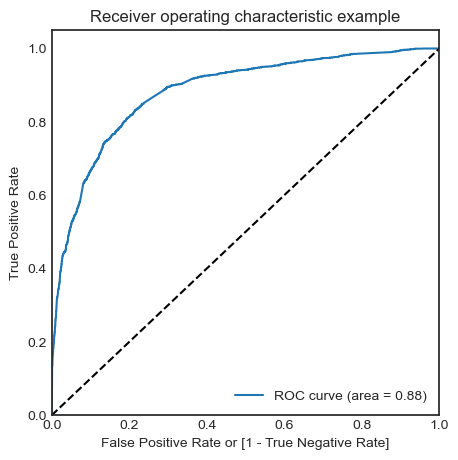

In [85]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC is .89 which is a good value

In [86]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.263376,0,1,1,1,0,0,0,0,0,0,0
1,1,0.997190,1,1,1,1,1,1,1,1,1,1,1
2,1,0.377355,0,1,1,1,1,0,0,0,0,0,0
3,0,0.264931,0,1,1,1,0,0,0,0,0,0,0
4,0,0.113101,0,1,1,0,0,0,0,0,0,0,0


In [87]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.597489,0.961733,0.376245
0.2,0.2,0.758303,0.902860,0.670498
0.3,0.3,0.801367,0.833474,0.781865
0.4,0.4,0.812808,0.766611,0.840868
0.5,0.5,0.812967,0.687132,0.889400
0.6,0.6,0.795487,0.574012,0.930013
0.7,0.7,0.783728,0.502523,0.954534
0.8,0.8,0.765295,0.421362,0.974202
0.9,0.9,0.716510,0.267031,0.989527


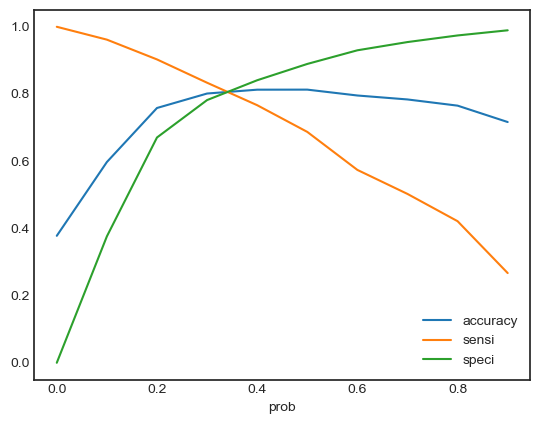

In [88]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph we can see optimal cut-off around .35

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.263376,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997190,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.377355,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.264931,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.113101,0,1,1,0,0,0,0,0,0,0,0,0


In [90]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8080406801207691

In [91]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3179,  736],
       [ 472, 1906]], dtype=int64)

In [92]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [93]:
# Calculating the sensitivity
TP/(TP+FN)

0.8015138772077376

In [94]:
# Calculating the specificity
TN/(TN+FP)

0.8120051085568327

While keeping Cut-off at .35 we are getting accuracy, sensitivity and specificity of around 81%

### Predictions on the Test set

In [95]:
#Scaling the numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [96]:
columns = X_train.columns

In [97]:
# Select the columns in X_train for X_test as well
X_test = X_test[columns]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[columns])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,0,0,0,0,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,0,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,1,0,0,0,1,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,0,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,0,1,0,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,0,0,0,0,0,0,1,0,0,0,0,0


In [98]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.103739
1,1,0.590576
2,1,0.426068
3,0,0.062183
4,0,0.488697


In [99]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.103739,0
1,1,0.590576,1
2,1,0.426068,1
3,0,0.062183,0
4,0,0.488697,1
...,...,...,...
2693,1,0.137025,0
2694,1,0.789271,1
2695,0,0.044291,0
2696,1,0.971392,1


In [100]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8020756115641215

In [101]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1347,  330],
       [ 204,  817]], dtype=int64)

In [102]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Calculating the sensitivity
TP/(TP+FN)

0.8001958863858962

In [104]:
# Calculating the specificity
TN/(TN+FP)

0.8032200357781754

While keeping Cut-off at .35 we are getting accuracy, sensitivity and specificity of around 80%

### Precision and Recall

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3482,  433],
       [ 744, 1634]], dtype=int64)

In [106]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7905176584421868

In [107]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6871320437342304

While keeping Cut-off at .35 we are getting Precision at 79% and Recall at 69%

### Precision and Recall tradeoff

In [108]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6288    0
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

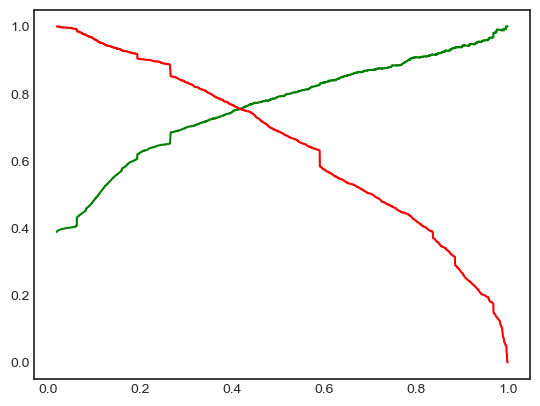

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.263376,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.997190,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.377355,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.264931,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.113101,0,1,1,0,0,0,0,0,0,0,0,0


In [112]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8150325758779596

In [113]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3339,  576],
       [ 588, 1790]], dtype=int64)

In [114]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [115]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7565511411665258

In [116]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7527333894028595

With the current cut off as 0.42 we have Precision around  Recall around 75% and accuracy 81%.

### Prediction on Test set

In [117]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.103739
1,1,0.590576
2,1,0.426068
3,0,0.062183
4,0,0.488697


In [118]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.103739,0
1,1,0.590576,1
2,1,0.426068,1
3,0,0.062183,0
4,0,0.488697,1
...,...,...,...
2693,1,0.137025,0
2694,1,0.789271,1
2695,0,0.044291,0
2696,1,0.971392,1


### Representing Conversion_Prob as Lead_Score

In [ ]:
#Converting Conversion probability into Lead_Score
y_pred_final["Lead_Score"] = y_pred_final["Conversion_Prob"]*100

### Checking overall accuracy of the model

In [119]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8083765752409192

In [120]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1416,  261],
       [ 256,  765]], dtype=int64)

In [121]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [122]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7456140350877193

In [123]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7492654260528894

With the current cut off as 0.42 we have Precision Recall aand round 75% and accuracy 81%.

With this we can conclude that the variables that matter most in determining potential buyers are: 

TotalVisits	

Total Time Spent on Website

Lead Origin_Lead Add Form	

Lead Source_Olark Chat	

Lead Source_Welingak Website	

Do Not Email_Yes	

Last Activity_Email Bounced	

Last Activity_Olark Chat Conversation	

What is your current occupation_Working Professional	

Last Notable Activity_Email Link Clicked	

Last Notable Activity_Email Opened	

Last Notable Activity_Modified	

Last Notable Activity_Olark Chat Conversation	

Last Notable Activity_Page Visited on Website